# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 3
shufflePixels = False
shuffleLabels = False

In [5]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(15000, 32, 32, 3)
(15000, 3)
(3000, 32, 32, 3)
(3000, 3)


Populating the interactive namespace from numpy and matplotlib


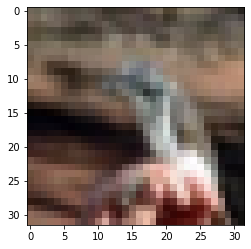

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

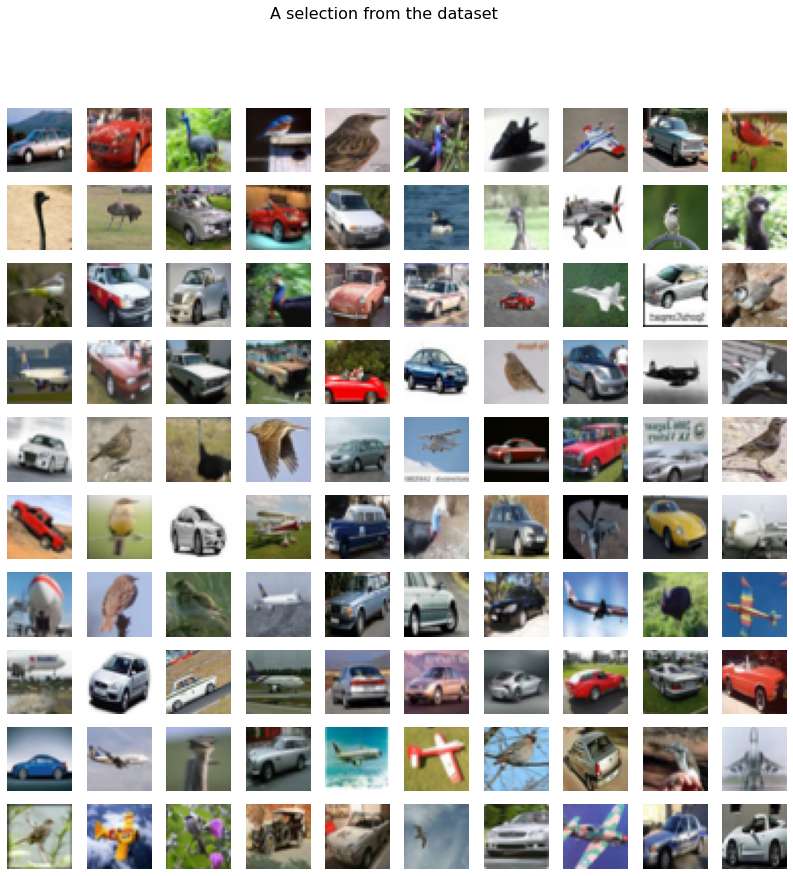

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx].reshape((32, 32, 3)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
#vgg16.summary()
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 10s 43ms/step - loss: 1.0973 - accuracy: 0.3461
test loss, test acc: [1.097346305847168, 0.3460666537284851]
Evaluate on test data
6/6 [==============================] - 1s 245ms/step - loss: 1.0972 - accuracy: 0.3467
test loss, test acc: [1.0972142219543457, 0.3466666638851166]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 6s 31ms/step - loss: 1.0238 - accuracy: 0.4881 - val_loss: 0.9051 - val_accuracy: 0.6410
Epoch 2/250
150/150 [==============================] - 4s 30ms/step - loss: 0.8488 - accuracy: 0.6315 - val_loss: 0.6275 - val_accuracy: 0.7663
Epoch 3/250
150/150 [==============================] - 4s 30ms/step - loss: 0.6889 - accuracy: 0.7169 - val_loss: 0.6518 - val_accuracy: 0.7407
Epoch 4/250
150/150 [==============================] - 4s 30ms/step - loss: 0.5480 - accuracy: 0.7801 - val_loss: 0.4537 - val_accuracy: 0.8260
Epoch 5/250
150/150 [==============================] - 4s 30ms/step - loss: 0.4607 - accuracy: 0.8191 - val_loss: 0.3840 - val_accuracy: 0.8507
Epoch 6/250
150/150 [==============================] - 4s 29ms/step - loss: 0.4115 - accuracy: 0.8367 - val_loss: 0.4204 - val_accuracy: 0.8350
Epoch 7/250
150/150 [==============================] - 4s 30ms/step - loss: 0.3614 - accuracy: 0.8593 - val_loss: 0.3724 - val_accuracy:

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 29ms/step - loss: 1.5837e-06 - accuracy: 1.0000
test loss, test acc: [1.5837445062061306e-06, 1.0]
Evaluate on test data
6/6 [==============================] - 0s 28ms/step - loss: 0.8498 - accuracy: 0.9117
test loss, test acc: [0.8498479127883911, 0.9116666913032532]


# Small

In [12]:
small = models.small(totalClass)
#small.summary()
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 8ms/step - loss: 11.5511 - accuracy: 0.3173
test loss, test acc: [11.551112174987793, 0.31726667284965515]
Evaluate on test data
6/6 [==============================] - 0s 27ms/step - loss: 11.5409 - accuracy: 0.3140
test loss, test acc: [11.540948867797852, 0.3140000104904175]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 2s 8ms/step - loss: 3.1008 - accuracy: 0.5300 - val_loss: 0.6515 - val_accuracy: 0.7457
Epoch 2/250
150/150 [==============================] - 1s 7ms/step - loss: 0.7430 - accuracy: 0.6999 - val_loss: 0.5610 - val_accuracy: 0.7807
Epoch 3/250
150/150 [==============================] - 1s 7ms/step - loss: 0.6227 - accuracy: 0.7480 - val_loss: 0.5066 - val_accuracy: 0.8083
Epoch 4/250
150/150 [==============================] - 1s 7ms/step - loss: 0.5548 - accuracy: 0.7753 - val_loss: 0.4732 - val_accuracy: 0.8180
Epoch 5/250
150/150 [==============================] - 1s 7ms/step - loss: 0.5196 - accuracy: 0.7967 - val_loss: 0.5017 - val_accuracy: 0.8080
Epoch 6/250
150/150 [==============================] - 1s 7ms/step - loss: 0.4884 - accuracy: 0.8079 - val_loss: 0.4516 - val_accuracy: 0.8263
Epoch 7/250
150/150 [==============================] - 1s 7ms/step - loss: 0.4675 - accuracy: 0.8157 - val_loss: 0.3847 - val_accuracy: 0.8520

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 0s 6ms/step - loss: 0.0131 - accuracy: 0.9992
test loss, test acc: [0.013050040230154991, 0.9991999864578247]
Evaluate on test data
6/6 [==============================] - 0s 7ms/step - loss: 0.3447 - accuracy: 0.9203
test loss, test acc: [0.3447060286998749, 0.9203333258628845]


#tNet

In [16]:
tNet = models.tNet(totalClass)
#tNet.summary()

In [17]:
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [18]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 2s 45ms/step - loss: 2.6258 - accuracy: 0.3326
test loss, test acc: [2.6258084774017334, 0.3325999975204468]
Evaluate on test data
6/6 [==============================] - 1s 155ms/step - loss: 2.6740 - accuracy: 0.3320
test loss, test acc: [2.6740190982818604, 0.3319999873638153]


In [19]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 8s 41ms/step - loss: 0.7593 - accuracy: 0.6849 - val_loss: 0.8768 - val_accuracy: 0.5930
Epoch 2/250
150/150 [==============================] - 6s 39ms/step - loss: 0.5329 - accuracy: 0.7893 - val_loss: 0.5152 - val_accuracy: 0.8037
Epoch 3/250
150/150 [==============================] - 6s 39ms/step - loss: 0.4258 - accuracy: 0.8382 - val_loss: 0.5162 - val_accuracy: 0.7967
Epoch 4/250
150/150 [==============================] - 6s 39ms/step - loss: 0.3496 - accuracy: 0.8707 - val_loss: 0.4615 - val_accuracy: 0.8173
Epoch 5/250
150/150 [==============================] - 6s 39ms/step - loss: 0.2817 - accuracy: 0.8995 - val_loss: 0.4125 - val_accuracy: 0.8450
Epoch 6/250
150/150 [==============================] - 6s 39ms/step - loss: 0.2274 - accuracy: 0.9227 - val_loss: 0.4463 - val_accuracy: 0.8357
Epoch 7/250
150/150 [==============================] - 6s 39ms/step - loss: 0.1874 - accuracy: 0.9363 - val_loss: 0.4556 - val_accuracy:

In [20]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 38ms/step - loss: 0.0034 - accuracy: 0.9995
test loss, test acc: [0.0033740305807441473, 0.9994666576385498]
Evaluate on test data
6/6 [==============================] - 0s 38ms/step - loss: 0.7722 - accuracy: 0.8603
test loss, test acc: [0.7721591591835022, 0.8603333234786987]


# ConvNet

In [21]:
convNet = models.convNet(totalClass)
#convNet.summary()

In [22]:
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 4s 66ms/step - loss: 1.5685 - accuracy: 0.3727
test loss, test acc: [1.5685360431671143, 0.3726666569709778]
Evaluate on test data
6/6 [==============================] - 2s 400ms/step - loss: 1.5660 - accuracy: 0.3783
test loss, test acc: [1.5660400390625, 0.37833333015441895]


In [24]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 7s 39ms/step - loss: 0.7042 - accuracy: 0.7146 - val_loss: 0.8409 - val_accuracy: 0.6070
Epoch 2/250
150/150 [==============================] - 6s 38ms/step - loss: 0.4653 - accuracy: 0.8102 - val_loss: 0.5646 - val_accuracy: 0.7627
Epoch 3/250
150/150 [==============================] - 6s 38ms/step - loss: 0.3967 - accuracy: 0.8423 - val_loss: 0.5054 - val_accuracy: 0.7953
Epoch 4/250
150/150 [==============================] - 6s 38ms/step - loss: 0.3407 - accuracy: 0.8633 - val_loss: 0.3427 - val_accuracy: 0.8640
Epoch 5/250
150/150 [==============================] - 6s 38ms/step - loss: 0.3035 - accuracy: 0.8805 - val_loss: 0.3214 - val_accuracy: 0.8743
Epoch 6/250
150/150 [==============================] - 6s 38ms/step - loss: 0.2833 - accuracy: 0.8887 - val_loss: 0.4306 - val_accuracy: 0.8353
Epoch 7/250
150/150 [==============================] - 6s 38ms/step - loss: 0.2522 - accuracy: 0.9017 - val_loss: 0.3048 - val_accuracy:

In [31]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 45ms/step - loss: 2.4701e-05 - accuracy: 1.0000
test loss, test acc: [2.4700686481082812e-05, 1.0]
Evaluate on test data
6/6 [==============================] - 0s 45ms/step - loss: 0.5018 - accuracy: 0.9280
test loss, test acc: [0.5018498301506042, 0.9279999732971191]


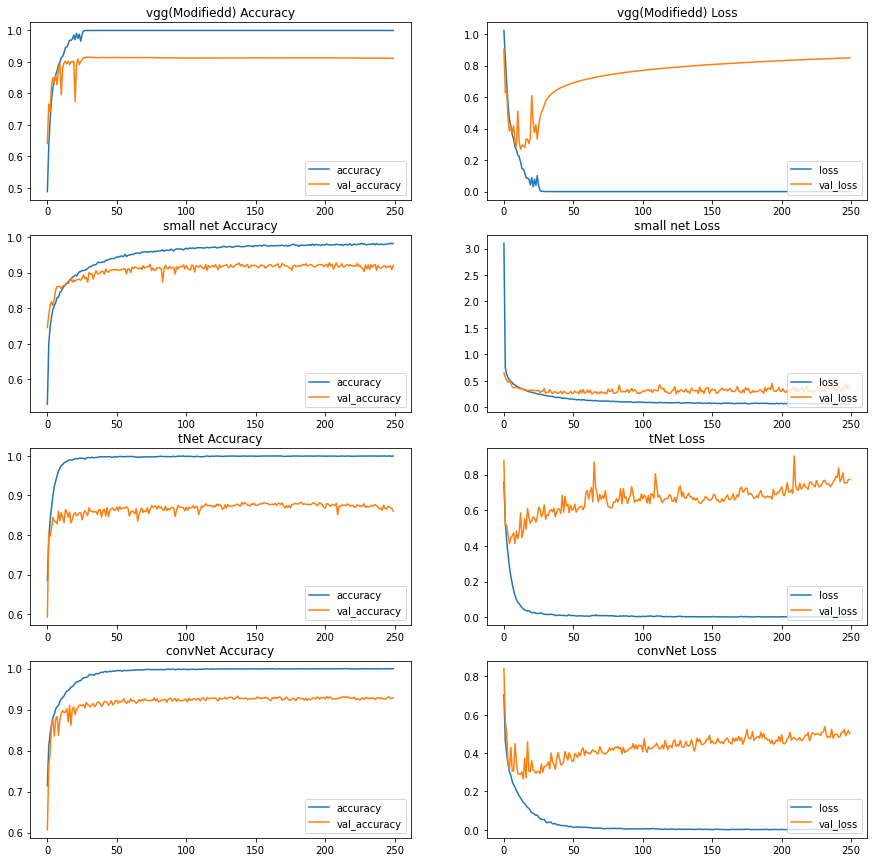

In [32]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1